# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Моя задача сделать исследовательский анализ данных и установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

Цель исследования:

1.Определить рыночную стоимость обьектов недвижимости.
2.Постороить автоматизированную систему, которая позволит отследить аномалии и мошенническую деятельность.
3.Установить какие факторы влияют на ценообразование стоимости квартиры.

Ход исследования:

Данные о недвижимости я получу из файла /datasets/real_estate_data.csv. О качестве данных ничего не известно. Поэтому перед тем, как приступить к целям исследования, понадобиться обзор данных.
Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я найду возможность исправить их, стараясь не искажать исходные данные, чтобы не было искажений в результатах исследования. Далее создам необходимые столбцы и приступлю к исследовательскому анализу.
Таким образом мое исследование будет из семи этапов.

1. Обзор данных.
2. Предобработка данных.
3. Расчеты и добавление результатов в таблицу.
4. Проведение анализа для Ленинградской области.
5. Проведение анализа для Санкт-Петербурга.
6. Выявление факторов , которые влияют на ценообразование стоимости квартиры.
7. Общий вывод.

## Обзор данных

### Импорт библиотеки pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Открытие данных 

Открываем файл из csv-файла в датафрейм c помощью библиотеки pandas. Данные склеились в одну строку из-за разделителей в формате csv. Для корректного открытия данных использовали разграничитель \t. Выводим для ознакомления с файлом первые пять строк на экран и общую информацию о файле. Выводим основную информацию о датафрейме с помощью метода info().

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display (data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

###  Вывод гистограмм датафрейма

Строим гистограммы для датафрейма data.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

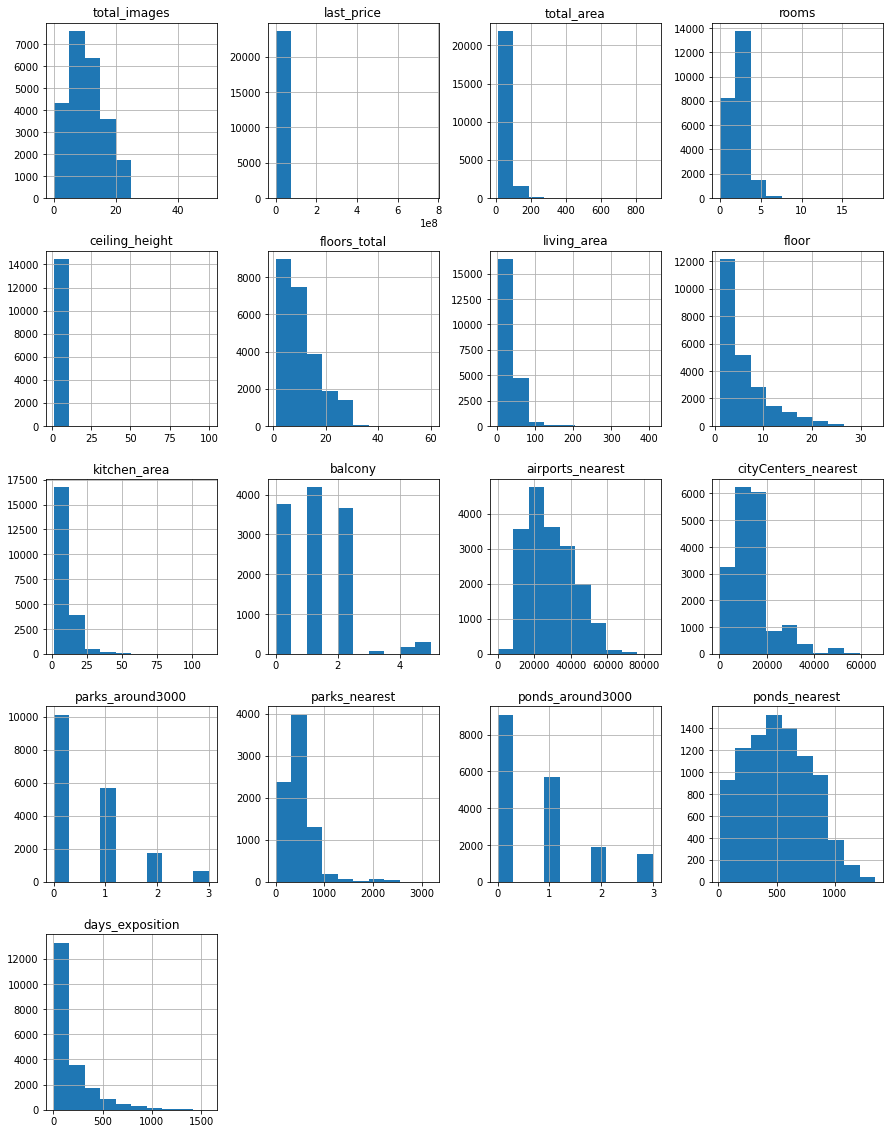

In [3]:
data.hist(figsize=(15, 20))


###  Вывод

Всего 22 параметра и 23699 строки. Есть выбросы в отдельных столбцах. 

## Предобработка данных

### Поиск пропущенных значений

Для выявления пропущенных значений исподьзуем функцию isna. 


In [4]:
data.isna().sum()

pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


### Замена пропущенных значений

В столбце с колличеством балконов пропущенные значения заменяем на ноль.
Пропущенная высота потолков заполнена значением 2.50 .
В столбце с количеством этажей исправила тип на целое число с помощью функции astype, пропущенные значения на значение этажа в строке.
Количество дней публикации пропуски заменены на 0 и исправлен тип на целое число.Количество балконов исправляем тип на целое число.
Решаем не удалять строки с пропусками, потому что явных дубликатов нет, проверили это с помощью функции duplicated().
Для промежуточных уточнений своих действиq используем команду display. С помощью функции unique()) смотрим все возможные значения в столбцах с этажами.

In [5]:

#  замена пропущенных значений

data['ceiling_height'] = data['ceiling_height'].fillna(2.50   )# где высота потолков Nan вводим 2.50
data['balcony'] = data['balcony'].fillna(0)   # где пропущено кол-во балконов ставим 0
data['living_area'] = data['living_area'].fillna(0)  # где пропущена жилая площадь ставим 0
data['floors_total'] = data['floors_total'].fillna(data['floor']) # где пропущено кол-во этажей ставим этаж квартиры, чтобы не терять данные
data['floors_total'] = data['floors_total'].astype('int') # меняем тип в кол-ве этажей в доме на целое значение
data['balcony'] = data['balcony'].astype('int') # меняем тип в кол-ве этажей в доме на целое значение
data['days_exposition'] = data['days_exposition'].fillna(0)  # где пропущена дни публикацц ставим 0
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)# где пропущено метры до центра ставим 0
data.duplicated().sum()
display (data['floors_total'].unique())
(data['floor'].unique())

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15,  1, 20, 28, 36, 21, 35, 34, 60, 29, 33,
       52, 37])

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

### Сведение населенных пунктов к единому списку без дупликатов.

Избавляемся от неявных дубликатов в названии населенного пункта для дальнейшего расчета. Для этого с помощью команды replace заменяем букву ё на е , а все фразы перед наименованием населенного пункта заменяем на пробел. Таким образом у нас достигается список уникальных значений с населенными пунктами.
Для проверки своих действий выводим эти уникальные значения на экран для вуализации своих действий. Заодно оценили частоту использования каждого населенного пункта функцией value_counts().
Для ознакомления со столбцом расстояние до центра города (м) также выводим уникальные значения для убеждения, что нет отрицательных значений.

In [6]:
# избавляемся от неявных дубликатов в названии населенного пункта

data['locality_name'].value_counts() # возвр. уникальные зн и кол-во их упоминаний
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа ', 'деревня ', 'село ', 'садовое товарищество ', 
    'городской поселок ', 'поселок ', 'городской ', 'городского типа ', 
    'садоводческое некоммерческое товарищество ', 'при железнодорожной станции ', 'станции ', 'коттеджный '], '',regex=True)
) 
display (data['locality_name'].unique())
data['locality_name'].value_counts()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Кирпичное              1
Борисова Грива         1
Садко                  1
Коммунары              1
Ялгино                 1
Name: locality_name, Length: 305, dtype: int64

In [7]:
data['cityCenters_nearest'].unique() #вывод уникальных зн

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

Снова просматриваем информацию с исправленными данными.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Выводы:

Значения Nan были обнаружены в следующих столбцах: высота потолков, всего этажей в доме, апартаменты, жилая площадь в квадратных метрах, площадь кухни и других столбцах с цисловыми значениями. На эти пропуски влияет человеческий фактор: невнимание при вводе информации или ее отсутствие.
В столбцах количество дней публикации, количество этажей и балконов был изменен тип на целое число для возможности подсчета и анализа в дальнейших вычислениях.
В столбце с названием населенного пункта избавились от неявных дубликатов. Это позволит нам анализировать данные более достоверно.

## Расчеты и добавление результатов в таблицу


### Добавляем новый столбец цена одного квад. метра


Цена одного кв. метра это отношение цены обьекта к общей площади. Используем блок try/except для обработки исключений, в частности деления на ноль. Это дополнительня мера, хотя ранее в столбце с обшей площадью нуля и пропущенных значений не обнаружили. Для наглядности результата используем функцию round с округлением до десятых.


In [9]:
#добавляем новые столбцы

#цена одного квадратного метра

try:
    data['price_m2'] = data['last_price']/data['total_area']
except:
    data['price_m2'] = 0
data['price_m2'] =round(data['price_m2'],2)
display (data['price_m2'].head(25))



0     120370.37
1      82920.79
2      92785.71
3     408176.10
4     100000.00
5      95065.79
6      99195.71
7     110544.69
8      87454.76
9      88524.59
10    127525.25
11     75000.00
12     72037.04
13     82943.93
14    122222.22
15    119230.77
16     81707.32
17    116111.11
18    104838.71
19    117355.37
20     76500.00
21    101265.82
22     86206.90
23     92187.50
24     66872.43
Name: price_m2, dtype: float64

### Добавляем столбцы:

день недели публикации -  'weekday_exposition',  месяц публикации -   'month_exposition' и год публикации - 'year_exposition', используя данные в столбце 'first_day_exposition' . Для проверки результата выводим первые 25 строк новых столбцов. Все результаты правильные.

In [10]:
# добавляем столбцы день недели публикации  месяц публикации  и год публикации  first_day_exposition 

data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
display (data['month_exposition'].head(25))
data['weekday_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
display (data['weekday_exposition'].head(25))
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
display (data['year_exposition'].head(25))

0      3
1     12
2      8
3      7
4      6
5      9
6     11
7      4
8      5
9      2
10    11
11     8
12     6
13     7
14     6
15    11
16    11
17     9
18     1
19     1
20     9
21     3
22     4
23    10
24    10
Name: month_exposition, dtype: int64

0     3
1     1
2     3
3     4
4     1
5     0
6     3
7     3
8     2
9     6
10    3
11    0
12    3
13    5
14    3
15    5
16    3
17    4
18    4
19    2
20    3
21    2
22    0
23    5
24    5
Name: weekday_exposition, dtype: int64

0     2019
1     2018
2     2015
3     2015
4     2018
5     2018
6     2017
7     2019
8     2018
9     2017
10    2017
11    2018
12    2016
13    2017
14    2016
15    2017
16    2017
17    2016
18    2017
19    2019
20    2017
21    2018
22    2017
23    2016
24    2015
Name: year_exposition, dtype: int64

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__

Совет на будущие работы `(в этом проекте этот метод не нужен)`: обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
     https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
    
    и
    
    https://www.sharpsightlabs.com/blog/pandas-astype/
</div>

### Добавляем столбец тип этажа квартиры

(значения — «первый», «последний», «другой»). Используем условный оператор в нашей функции floor_group, в качестве параметров передаем строку. Выводим для проверки 25 строк. Функция сработала корректно.

In [11]:
def floor_group(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor==1:
        return 'первый'
    if floor==floors_total:
        return 'последний'
    return 'другой'
data['floor_category'] = data.apply(floor_group,axis=1)
display (data['floor_category'].head(25))

0        другой
1        первый
2        другой
3        другой
4        другой
5        другой
6        другой
7        другой
8        другой
9        другой
10       другой
11       другой
12    последний
13    последний
14       первый
15       другой
16       первый
17       другой
18       другой
19       другой
20       другой
21       другой
22       другой
23    последний
24       первый
Name: floor_category, dtype: object

### Добавляем столбец - расстояние до центра города 

В километрах используя столбец cityCenters_nearest ( он в метрах) вычисляем тоже расстояние в других единицах измерения. Для наглядности результата выводим 25 первых значений в формате до 2 значений после запятой, используя функцию округления round.

In [12]:
# добавляем столбец - расстояние до центра города в километрах из cityCenters_nearest в метрах
data['cityCenters_neares_km'] = data['cityCenters_nearest']/1000
data['cityCenters_neares_km'] = round(data['cityCenters_neares_km'],0)
display (data['cityCenters_neares_km'].head(25))



0     16.0
1     19.0
2     14.0
3      7.0
4      8.0
5      0.0
6     19.0
7     12.0
8      0.0
9     15.0
10    14.0
11    52.0
12     0.0
13    33.0
14    31.0
15    14.0
16    11.0
17    15.0
18    11.0
19    13.0
20    19.0
21    10.0
22     0.0
23    14.0
24     2.0
Name: cityCenters_neares_km, dtype: float64

## Проводим исследовательский анализ данных


Для визуализации данных в Python чаще всего используют библиотеки Matplotlib

<AxesSubplot:>

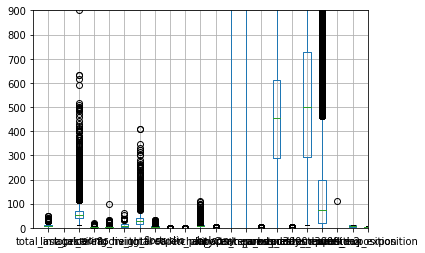

In [13]:
import matplotlib.pyplot as plt
plt.ylim(0, 900)
plt.xlim(0, 22)
data.boxplot()

### Общая площадь


Строим гистограму, ящик с усами и смотрим аномальные выбросы.

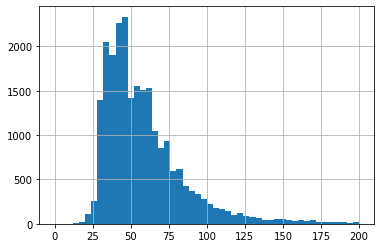

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,month_exposition,weekday_exposition,year_exposition,floor_category,cityCenters_neares_km
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,2.50,5,0.0,5,NaN,...,NaN,2.0,210.0,0.0,221870.05,3,5,2019,последний,5.0
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,2.50,4,332.0,3,NaN,...,477.0,2.0,540.0,0.0,96711.80,10,5,2017,другой,2.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6,409.0,3,NaN,...,767.0,0.0,NaN,14.0,110169.49,2,3,2019,другой,5.0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.45,7,301.5,7,True,...,110.0,0.0,NaN,1078.0,165680.47,12,3,2015,последний,6.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4,322.3,4,NaN,...,NaN,2.0,210.0,0.0,221799.75,4,1,2019,последний,5.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7,258.0,5,NaN,...,NaN,2.0,198.0,111.0,485436.89,12,0,2017,другой,5.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25,409.7,25,NaN,...,NaN,2.0,318.0,106.0,466666.67,12,2,2017,последний,8.0


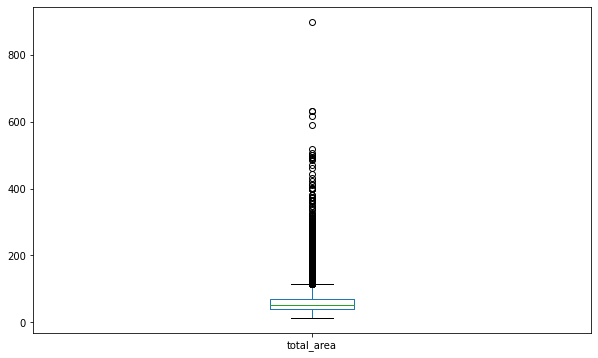

In [14]:
data['total_area'].hist(bins = 50, range = (0,200))
plt.show()
data['total_area'].plot(kind='box', figsize=(10, 6))
display (data['total_area'].describe())
data[data['total_area']>500]

В столбце общая площадь есть выброс со значением общей площади 900 кв. м. Если проанализироватьвсю строку, то данные в этой строке также имеют анамальные значения. Это кол-во этажей и жилая площадь. Решаем избавиться от этой строки, удалив ее.

<AxesSubplot:>

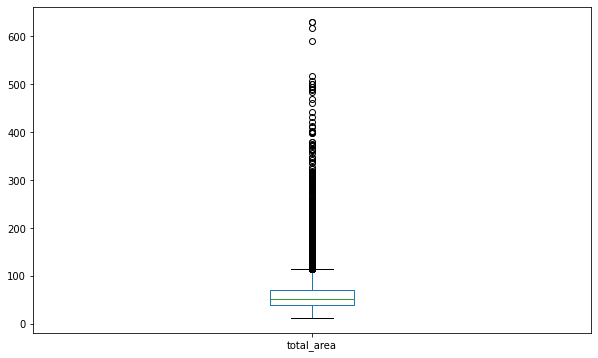

In [15]:
data.drop(data.loc[data['total_area'] >899].index, inplace=True)

data['total_area'].plot(kind='box', figsize=(10, 6))

### Жилая площадь

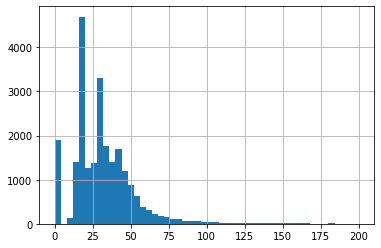

count    23698.000000
mean        31.674979
std         22.979318
min          0.000000
25%         17.800000
50%         29.000000
75%         41.100000
max        409.000000
Name: living_area, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,month_exposition,weekday_exposition,year_exposition,floor_category,cityCenters_neares_km
660,3,49950000.0,483.9,2017-10-04T00:00:00,7,3.20,6,312.5,4,NaN,...,461.0,3.0,22.0,391.0,103223.81,10,2,2017,другой,1.0
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,2.50,4,332.0,3,NaN,...,477.0,2.0,540.0,0.0,96711.80,10,5,2017,другой,2.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6,409.0,3,NaN,...,767.0,0.0,NaN,14.0,110169.49,2,3,2019,другой,5.0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.45,7,301.5,7,True,...,110.0,0.0,NaN,1078.0,165680.47,12,3,2015,последний,6.0
12401,20,91500000.0,495.0,2017-06-19T00:00:00,7,4.65,7,347.5,7,NaN,...,110.0,0.0,NaN,14.0,184848.48,6,0,2017,последний,6.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4,322.3,4,NaN,...,NaN,2.0,210.0,0.0,221799.75,4,1,2019,последний,5.0


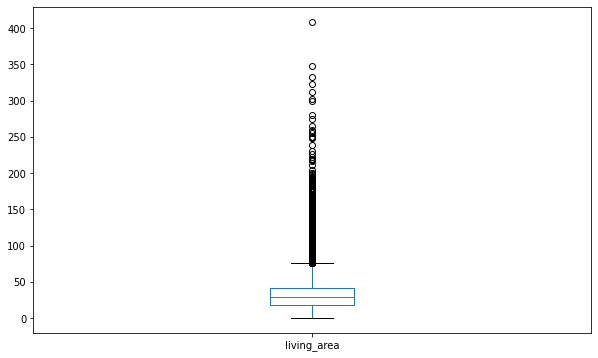

In [16]:
data['living_area'].hist(bins = 50, range = (0,200))
plt.show()
data['living_area'].plot(kind='box', figsize=(10, 6))
display (data['living_area'].describe())
data[data['living_area']>300]

В столбце с жилой площадью есть также одно аномальное отклонение, решаем его оставить.

### Площадь кухни

count    21420.000000
mean        10.565072
std          5.864766
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

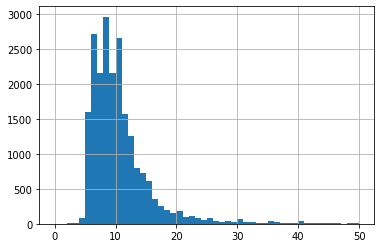

<AxesSubplot:>

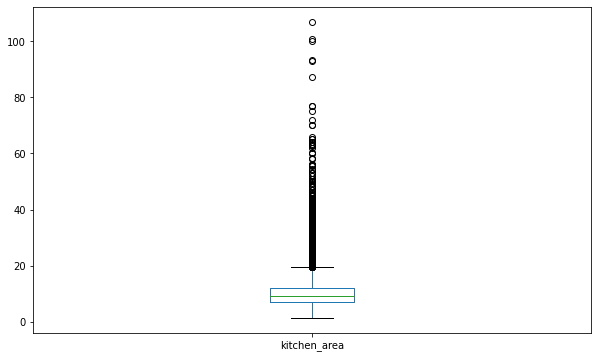

In [17]:
data['kitchen_area'].hist(bins = 50, range = (0,50))
display (data['kitchen_area'].describe())
plt.show()
data['kitchen_area'].plot(kind='box', figsize=(10, 6))

###  Цена объекта

count    2.369800e+04
mean     6.524102e+06
std      1.055073e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799750e+06
max      7.630000e+08
Name: last_price, dtype: float64

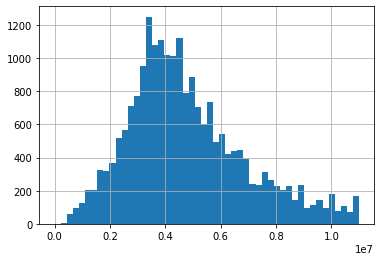

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,month_exposition,weekday_exposition,year_exposition,floor_category,cityCenters_neares_km
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,2.5,10,250.0,10,NaN,...,530.0,3.0,756.0,33.0,1907500.0,9,5,2017,последний,4.0


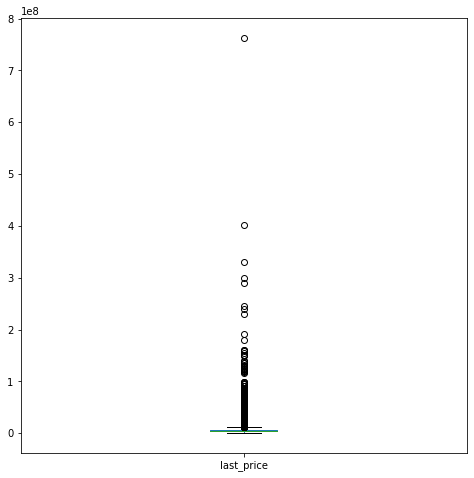

In [18]:
data['last_price'].hist(bins = 50, range = (0,11000000))
display (data['last_price'].describe())
plt.show()
data['last_price'].plot(kind='box', figsize=(8, 8))
data[data['last_price']>500000000]

### Количество комнат

count    23698.000000
mean         2.070217
std          1.076497
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

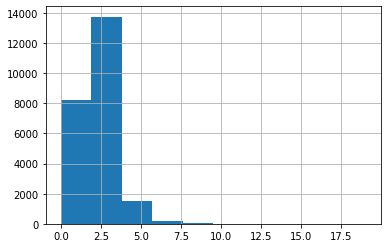

In [19]:
data['rooms'].hist(bins = 10, range = (0,19))
data['rooms'].describe()

### Высота потолков

count    23698.000000
mean         2.666154
std          0.995376
min          1.000000
25%          2.500000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

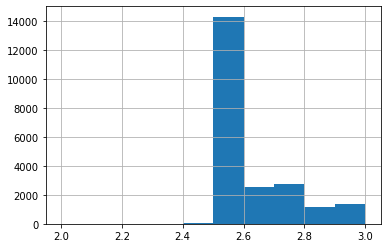

In [20]:
data['ceiling_height'].hist(bins = 10, range = (2,3))
data['ceiling_height'].describe()


В высоте потолков есть явные выбросы. Попробуем от них избавиться. Все, что выше 23 метров,считаем за человеческий фактор при вводе информации.Поэтому делим значение на 10.


In [21]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x:x/10 if x>23 else x)

data['ceiling_height'].unique()

array([ 2.7 ,  2.5 ,  3.03,  2.67,  2.56,  3.05,  2.75,  2.6 ,  2.9 ,
        2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

### Тип этажа квартиры («первый», «последний», «другой»)

count      23698
unique         3
top       другой
freq       17363
Name: floor_category, dtype: object

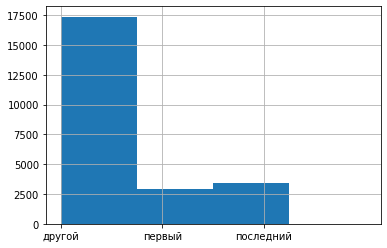

In [22]:
data['floor_category'].hist(bins = 4, range = (0,3))
data['floor_category'].describe()

###  Общее количество этажей в доме

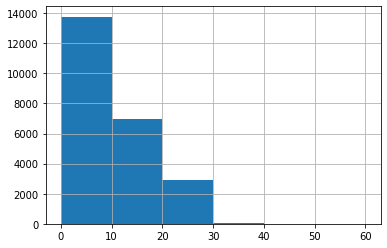

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,month_exposition,weekday_exposition,year_exposition,floor_category,cityCenters_neares_km
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60,27.4,4,NaN,...,342.0,3.0,614.0,166.0,83516.48,6,3,2018,другой,49.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52,10.5,18,NaN,...,793.0,0.0,NaN,45.0,99450.00,9,0,2018,другой,13.0


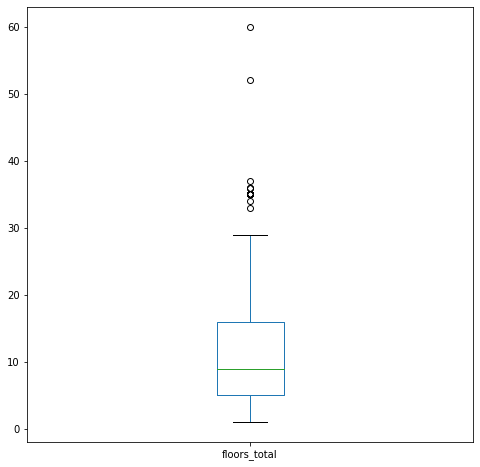

In [23]:
data['floors_total'].hist(bins = 6, range = (0,60))
data['floors_total'].describe()
plt.show()
data['floors_total'].plot(kind='box', figsize=(8, 8))
data[data['floors_total']>50]

По этажам есть два выброса, но они не влияют на исследуемые данные.

###  Расстояние до центра города в метрах

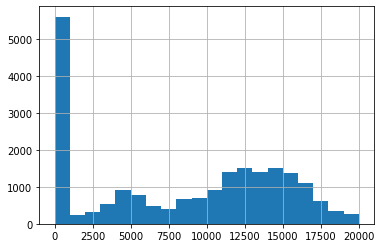

<AxesSubplot:>

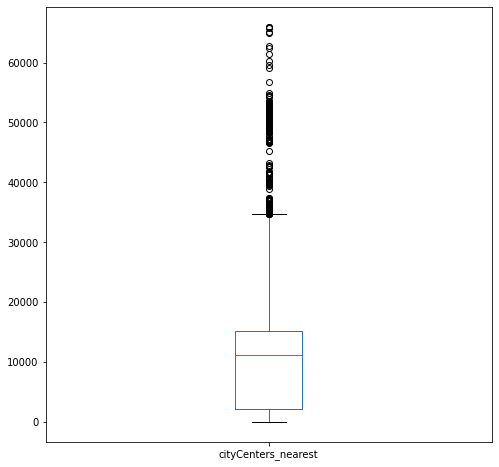

In [24]:
data['cityCenters_nearest'].hist(bins = 20, range = (0,20000))
data['cityCenters_nearest'].describe()
plt.show()
data['cityCenters_nearest'].plot(kind='box', figsize=(8, 8))

### Расстояние до ближайшего парка

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

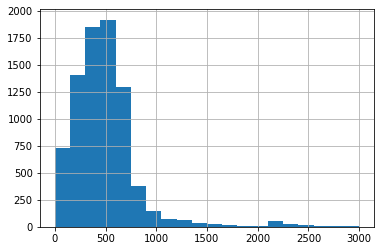

In [25]:
data['parks_nearest'].hist(bins = 20, range = (0,3000))
data['parks_nearest'].describe()

Комментарий от Ирины N 4.
Решения (по 4.2 в разделе 7 -  это перенесла в 4 раздел) а по  4.3 теперь в разделе 7. В 7 очень много ячеек, поэтому не переношу. К сожалению не сразу заметила последовательность заданий.
По поводу быстрых и медленных продаж - построила как просят в задании гистограмму и посчитала среднюю и медиану. А также как ты рекомендовал применила метод describe() и более того почтроила гистограмму на срезе. Визуально определила быстрые и медленные продажи. Что еще необходимо не очень понимаю(.

### Изучаем, как быстро продавались квартиры
(столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление
Смотрим какие продажи считать быстрыми, а какие долгими. 

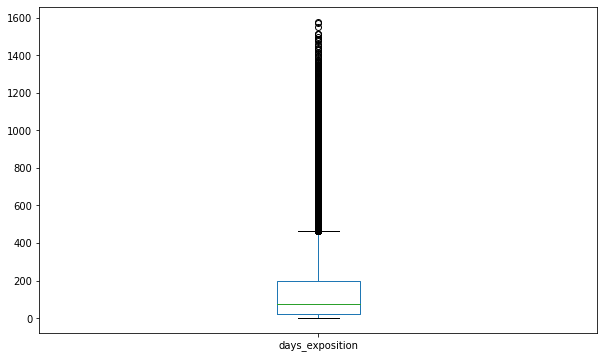

count    23698.000000
mean       156.610980
std        213.551126
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

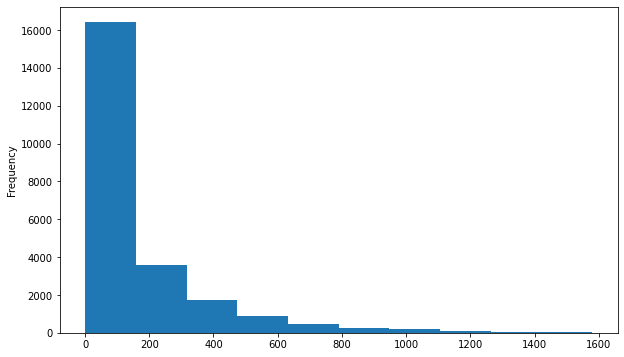

In [26]:
data['days_exposition'].plot(kind='box', figsize=(10, 6))
plt.show()
display (data['days_exposition'].describe())
data['days_exposition'].plot(kind='hist', figsize=(10, 6))

На диаграмме с усами видно, что средняя величина публикаций до продажи обьекта недвижимости три месяца. Медийное значение 95 дней. Также видим , что необычно долгие обьявления все, что более 600 дней.

Для исследования более быстрых продаж делаем срез по дням публикации до 180 дней и не менее 0 дней. Затем строим гистограму и сортировку по срезу.

45.0     880
60.0     538
7.0      234
30.0     208
90.0     204
        ... 
129.0     27
171.0     26
148.0     16
2.0        3
1.0        1
Name: days_exposition, Length: 179, dtype: int64

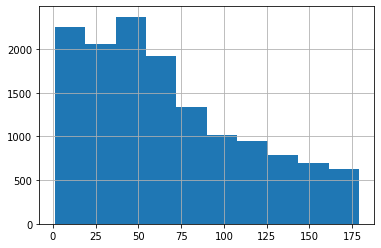

In [27]:
data_query = data.query('days_exposition>0 and days_exposition< 180')
data_query['days_exposition'].hist(bins=10)
data_query['days_exposition'].value_counts()

Самые быстрые продажи до 50 дней.

### Вывод
На диаграмме с усами видно, что средняя величина публикаций до продажи обьекта недвижимости 156 дней. Медийное значение 75 дней. Также видим , что необычно долгие обьявления все, что более 500 дней.
Самые быстрые продажи до 50 дней определили по срезу до 180 дней.

## Проведение анализа для Ленинградской области.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим  таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.
С помощью среза [:10] по самым 10 наибольшим (т.е. длинным) по числу обращений насел. пунктов  создаем список 10 топ населенных пунктов - top_10.
Среднюю цену для топа 10 населенных пунктов считаем используя функцию mean,сгруппировав датафрейм по имени населенного пункта locality_name, предварительно проверив, что населенный пункт входит в список  топ 10 .

In [28]:
top_10 = data['locality_name'].value_counts()[:10].index.tolist()
data_top = data[data['locality_name'].isin(top_10)].groupby('locality_name')['price_m2'].mean().sort_values(ascending=False)
display (data_top)
display ('Самая высокая средняя цена квадратного метра:',round (data_top.max(),2))
display ('Самая низкая из 10 топ пунктов средняя цена квадратного метра:',round (data_top.min(),2))


locality_name
Санкт-Петербург    114826.628535
Пушкин             103125.819377
Кудрово             95324.930508
Парголово           90175.913089
Мурино              86087.512017
Шушары              78677.364318
Колпино             75424.579112
Гатчина             68746.146515
Всеволожск          68654.473970
Выборг              58141.909325
Name: price_m2, dtype: float64

'Самая высокая средняя цена квадратного метра:'

114826.63

'Самая низкая из 10 топ пунктов средняя цена квадратного метра:'

58141.91

In [29]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15720,5500000.0
Мурино,590,3400000.0
Кудрово,472,3890000.0
Шушары,440,3950000.0
Всеволожск,398,3450000.0
Пушкин,369,5180000.0
Колпино,338,3600000.0
Парголово,327,4100000.0
Гатчина,307,3100000.0


### Вывод
В Ленинградской области самая высокая средняя цена за квадратный метр в Санкт-Петербурге. Она соаставляет 114849.01 руб. Самая низкая цена из 10 наиболее частоупоминаемых в обьявлениях цена в Выборге. Там средняя цена квадратного метра 58141.91 руб. Ниже почти в два раза максимальной цены. Вывели таблицу 10 топ населенных пунктов со средней ценой кв. метра.

## Проведение анализа для Санкт-Петербурга

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра. Учитывая каждый километр расстояния: узнаем среднюю цену квартир в одном километре от центра, в двух и так далее. Построим график изменения средней цены для каждого километра от центра Петербурга.
Для этого я создаю еще один столбец который на основе столбца cityCenters_neares_km округляет его до целых значений, как нам нужно для выполнения задания разбивки на километрам.
Сгруппировав по новому столбцу датафрейм ищу для каждого километра среднее значение кв. метра и сортирую в порядке возрастания этой цены.
Для наглядности полученных вычислений использую метод plot, указав оси соотвествено в зависимости х - удаленности  от у - цены квадратного метра.
На втором графике используем метод plot для удаленности обьекта недвижимости до 30 км, чтобы разглядеть зависимость.

cityCenters_neares_km
1.0     176640.649741
2.0     157944.348103
7.0     156176.879524
6.0     151012.193673
5.0     140324.467478
            ...      
60.0     65221.775000
0.0      63388.020555
63.0     62500.000000
42.0     62479.371667
61.0     60606.060000
Name: price_m2, Length: 61, dtype: float64

<AxesSubplot:xlabel='cityCenters_neares_km'>

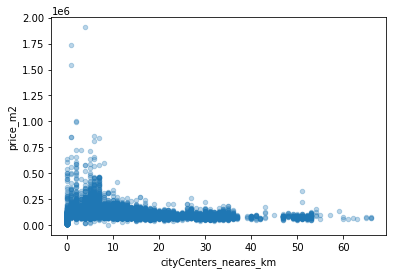

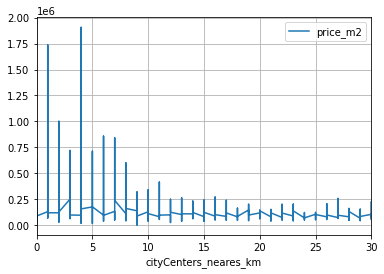

In [30]:
display (data.groupby('cityCenters_neares_km')['price_m2'].mean().sort_values(ascending=False))
data.sort_values('cityCenters_neares_km').plot(x = 'cityCenters_neares_km',y = 'price_m2',kind = 'scatter', alpha=0.3 )
data.sort_values('cityCenters_neares_km').plot(x = 'cityCenters_neares_km',y = 'price_m2',xlim=(0,30),grid = True )

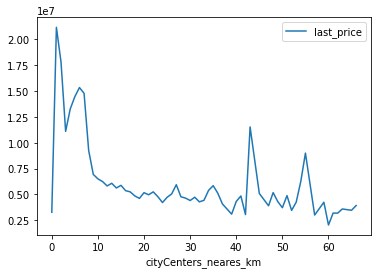

<AxesSubplot:xlabel='cityCenters_neares_km'>

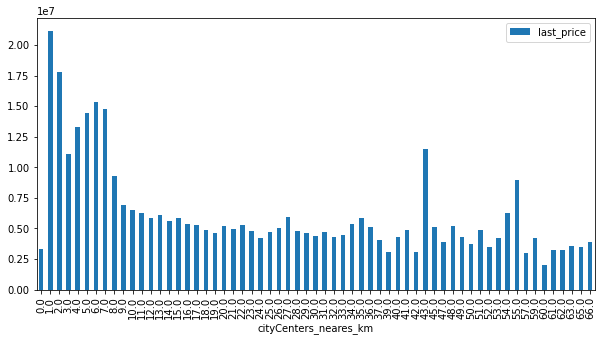

In [31]:
data.pivot_table(index = 'cityCenters_neares_km', values = 'last_price', aggfunc = 'mean')\
    .plot()
plt.show()
data.pivot_table(index = 'cityCenters_neares_km', values = 'last_price', aggfunc = 'mean')\
    .plot(y='last_price', kind = 'bar',figsize=(10,5))

Сделали сводную таблицу  по зависиомсти: удаленность от центра населенногопункта - средняя цена , линейный график и столбчатый графики. 

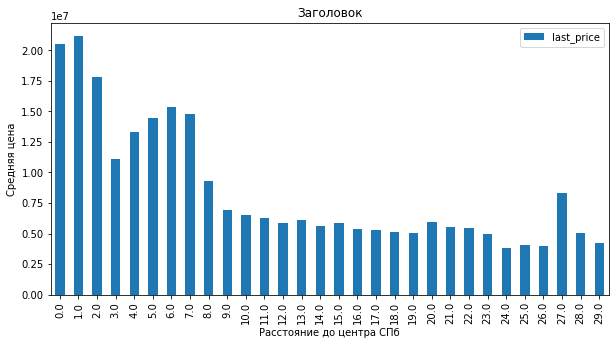

In [41]:
value = 'Санкт-Петербург'
data.query('locality_name == @value')\
    .pivot_table(index = 'cityCenters_neares_km', values = 'last_price', aggfunc = 'mean')\
    .plot(y='last_price', kind = 'bar',figsize=(10,5), xlabel = 'Расстояние до центра СПб', ylabel = 'Средняя цена', title = 'Заголовок') 
plt.show()

Сделали сводную таблицу по СПБ и по зависиомсти: удаленность от центра  - средняя цена, построили столбчатую диаграмму. 

### Вывод
На стоимость квадратного метра влияет удаленность квартиры от центра. В пределах 7 км от центра Санкт-Петербурга самая большая цена квадратного метра.

## Выявление факторов , которые влияют на ценообразование стоимости квартиры.

Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.
Изучим, зависит ли цена от:
o	общей площади;
o	жилой площади;
o	площади кухни;
o	количества комнат;
o	этажа, на котором расположена квартира (первый, последний, другой);
o	даты размещения (день недели, месяц, год).
Построим графики, которые покажут зависимость цены от указанных выше параметров.


In [33]:
display (data['days_exposition'].value_counts()) #вывод уникальных зн
#data['days_exposition'].hist(bins=20,range=(0,300))
#data['days_exposition'].hist(bins=20,range=(100,200))
#data['days_exposition'].hist(bins=20,range=(200,300))
display (data['days_exposition'].mean())
display (data['days_exposition'].median())
display (data['days_exposition'].describe())
#data.sort_values('last_price').plot(x = 'last_price',y = 'floor_category',kind = 'scatter', alpha=0.3 )

#data.plot(x = 'last_price',y = 'floor_category',kind = 'hexbin', gridsize=20, figsize=(8,6), sharex=False, grid=True)
#data_agr = data[['locality_name', 'price_m2']].agg(['mean', 'median', 'min', 'max'])

0.0       3181
45.0       880
60.0       538
7.0        234
30.0       208
          ... 
1114.0       1
1105.0       1
920.0        1
1135.0       1
1174.0       1
Name: days_exposition, Length: 1142, dtype: int64

156.61097982952148

74.0

count    23698.000000
mean       156.610980
std        213.551126
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

('Коэфициент корриляции цена-общ.площадь=', 0.6431493531735254)

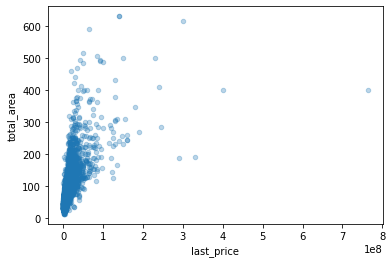

In [34]:
data.sort_values('last_price').plot(x = 'last_price',y = 'total_area',kind = 'scatter', alpha=0.3 )
('Коэфициент корриляции цена-общ.площадь=',data['last_price'].corr(data['total_area']))

('Коэфициент корриляции цена-жилая площадь=', 0.48203525966983124)

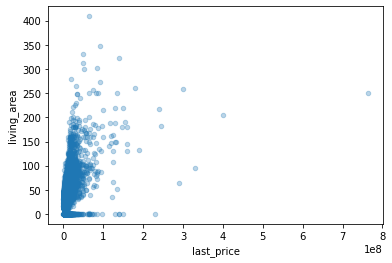

In [35]:
data.sort_values('last_price').plot(x = 'last_price',y = 'living_area',kind = 'scatter', alpha=0.3 )
('Коэфициент корриляции цена-жилая площадь=',data['last_price'].corr(data['living_area']))

('Коэфициент корриляции цена-площадь кухни=', 0.5112001537972394)

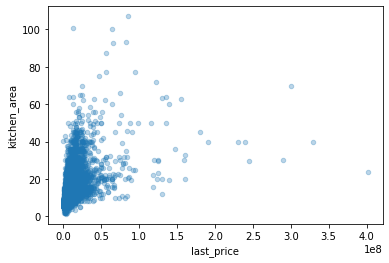

In [36]:
data.sort_values('last_price').plot(x = 'last_price',y = 'kitchen_area',kind = 'scatter', alpha=0.3 )
('Коэфициент корриляции цена-площадь кухни=',data['last_price'].corr(data['kitchen_area']))

<AxesSubplot:xlabel='rooms'>

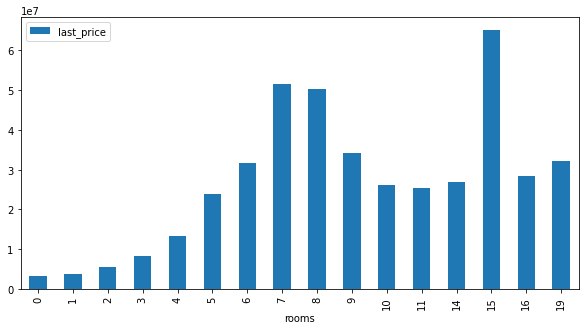

In [37]:
#data.sort_values('last_price').plot(x = 'last_price',y = 'rooms',kind = 'scatter', alpha=0.3 )
#('Коэфициент корриляции цена-кол-во комнат=',data['last_price'].corr(data['rooms']))
data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean')\
    .plot(kind = 'bar',figsize=(10,5))

'Коэфициент корриляции цена-месяц ='

0.0002154613291751138

<AxesSubplot:xlabel='month_exposition'>

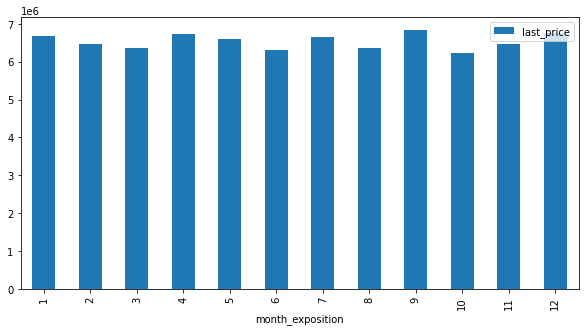

In [38]:
#data.sort_values('last_price').plot(x = 'last_price',y = 'month_exposition',kind = 'scatter', alpha=0.3 )
display ('Коэфициент корриляции цена-месяц =',data['last_price'].corr(data['month_exposition']))
data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = 'mean')\
    .plot(kind = 'bar',figsize=(10,5))

<AxesSubplot:xlabel='year_exposition'>

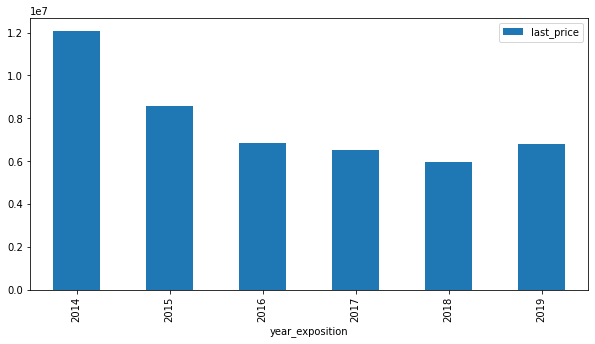

In [39]:
#data.sort_values('last_price').plot(x = 'last_price',y = 'year_exposition',kind = 'scatter', alpha=0.3 )
#('Коэфициент корриляции цена-год =',data['last_price'].corr(data['year_exposition']))
data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = 'mean')\
    .plot(kind = 'bar',figsize=(10,5))

<AxesSubplot:xlabel='weekday_exposition'>

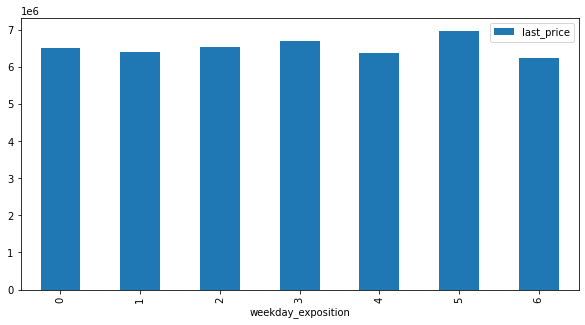

In [40]:
#data.sort_values('last_price').plot(x = 'last_price',y = 'weekday_exposition',kind = 'scatter', alpha=0.3 )
#('Коэфициент корриляции цена-день недели =',data['last_price'].corr(data['weekday_exposition']))
data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = 'mean')\
    .plot(kind = 'bar',figsize=(10,5))

Используя метод plot и вычислив коэффициент корреляции методом corr пришли к следующим выводам. Коэфициенты корриляции цена-общ.площадь, цена-жилая площадь, цена-площадь кухни близки к 0.5, это говорит о зависимости этих величин друг от друга. В меньшей зависиомсти соотношение цена-кол-во комнат. А от даты дубликации( месяца, года и дня недели) нет никакой зависимости.

## Общий вывод

При анализе данных с продолжительностью публикации до продажи, выявлено: 
есть выбросы в исследуемом столбце - это значения более шестиста дней,
медийное значение 95 дней, среднее значение 180 дней. Самые быстрые продажи до 50 дней.

На гистограмме видно, что наибольшее колличество продаж в диапазоне до 90 дней. 

Построили сводную таблицу, сгруппированную по названиям населенных пунктов и посчитали среднюю стоимость квадратного метра по каждому пункту.

Проведение анализа для Ленинградской области показало, что самая высокая средняя цена за квадратный метр в Санкт-Петербурге. Она соаставляет 114849.01 руб. Самая низкая цена из 10 наиболее частоупоминаемых в обьявлениях цена в Выборге. Там средняя цена квадратного метра 58141.91 руб. Ниже почти в два раза максимальной цены.

При проведении анализа для Санкт-Петербурга выявили, что на  стоимость квадратного метра влияет удаленность квартиры от центра. Самая высокая стоимость в предалах 10 км от центра.

Изучили факторы, которые больше всего влияют на общую (полную) стоимость объекта, опираясь на данные графиков и коэффициентов корреляции.
Т.к коэффиценты  у общая площадь; жилая площадь; площадь кухни; количество комнат; тип этажа около 0.5 они влияют на общую стоимость жилья.
Наибольшее влияние показателя с общей площадью. 
Месяц, год и день недели публикации на стоимость не влияют.

